In [173]:
import numpy as np


In [174]:
import pandas as pd


In [175]:
import matplotlib.pyplot as plt

In [176]:
import tensorflow as tf

In [177]:
!pip install tensorflow


In [178]:
import tensorflow as tf

In [179]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
from tensorflow.keras.models import Sequential

In [181]:
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [182]:
df = pd.read_csv('HEROMOTOCO.csv')

In [183]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HEROHONDA,EQ,1145.20,1200.0,1236.80,1171.00,1209.95,1207.60,1209.11,10631,1.285401e+12,NaN,NaN,NaN
1,2000-01-04,HEROHONDA,EQ,1207.60,1200.0,1220.00,1176.00,1200.00,1199.85,1200.93,19849,2.383719e+12,NaN,NaN,NaN
2,2000-01-05,HEROHONDA,EQ,1199.85,1155.0,1178.00,1140.00,1140.00,1143.80,1159.74,2525,2.928355e+11,NaN,NaN,NaN
3,2000-01-06,HEROHONDA,EQ,1143.80,1183.0,1189.95,1150.25,1165.00,1161.40,1167.29,4375,5.106887e+11,NaN,NaN,NaN
4,2000-01-07,HEROHONDA,EQ,1161.40,1140.0,1140.00,1069.00,1105.00,1106.55,1103.52,9093,1.003429e+12,NaN,NaN,NaN


In [186]:
data = df['Close'].values.reshape(-1, 1)


In [187]:
print(df.columns)


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [190]:
print(df['Close'].dtypes)


float64


In [191]:
scaler = MinMaxScaler()

In [192]:
data = scaler.fit_transform(data)

In [193]:
train_size = int(len(data) * 0.8)

In [194]:
# Split the data into training and testing sets

In [195]:
train_data = data[:train_size]

In [196]:
test_data = data[train_size:]

In [197]:
# Define a function to create sequences for the LSTM model

In [198]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [199]:
# Set the sequence length (number of time steps)


In [200]:
seq_length=10

In [201]:
# Create sequences for training and testing

In [202]:
X_train = create_sequences(train_data, seq_length)

In [203]:
X_test = create_sequences(test_data, seq_length)

In [204]:
y_train = train_data[seq_length:]

In [205]:
y_test = test_data[seq_length:]

In [206]:
model = Sequential()

In [207]:
X_train = X_train.reshape(X_train.shape[0], seq_length, 1)
X_test = X_test.reshape(X_test.shape[0], seq_length, 1)


In [208]:
y_train = train_data[seq_length:]
y_test = test_data[seq_length:]


In [209]:

model = Sequential()

In [210]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))  # Output layer


In [211]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [212]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_19 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [213]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
67/67 [==============================] - 8s 29ms/step - loss: 0.0312 - val_loss: 0.0027
Epoch 2/50
67/67 [==============================] - 2s 23ms/step - loss: 3.7763e-04 - val_loss: 0.0022
Epoch 3/50
67/67 [==============================] - 2s 23ms/step - loss: 3.5350e-04 - val_loss: 0.0019
Epoch 4/50
67/67 [==============================] - 2s 23ms/step - loss: 3.4823e-04 - val_loss: 9.7112e-04
Epoch 5/50
67/67 [==============================] - 1s 22ms/step - loss: 3.1286e-04 - val_loss: 9.9392e-04
Epoch 6/50
67/67 [==============================] - 2s 23ms/step - loss: 3.0641e-04 - val_loss: 9.4573e-04
Epoch 7/50
67/67 [==============================] - 2s 23ms/step - loss: 3.0247e-04 - val_loss: 0.0014
Epoch 8/50
67/67 [==============================] - 2s 22ms/step - loss: 3.3480e-04 - val_loss: 9.5571e-04
Epoch 9/50
67/67 [==============================] - 2s 25ms/step - loss: 3.0994e-04 - val_loss: 8.3825e-04
Epoch 10/50
67/67 [==============================] - 2s 2

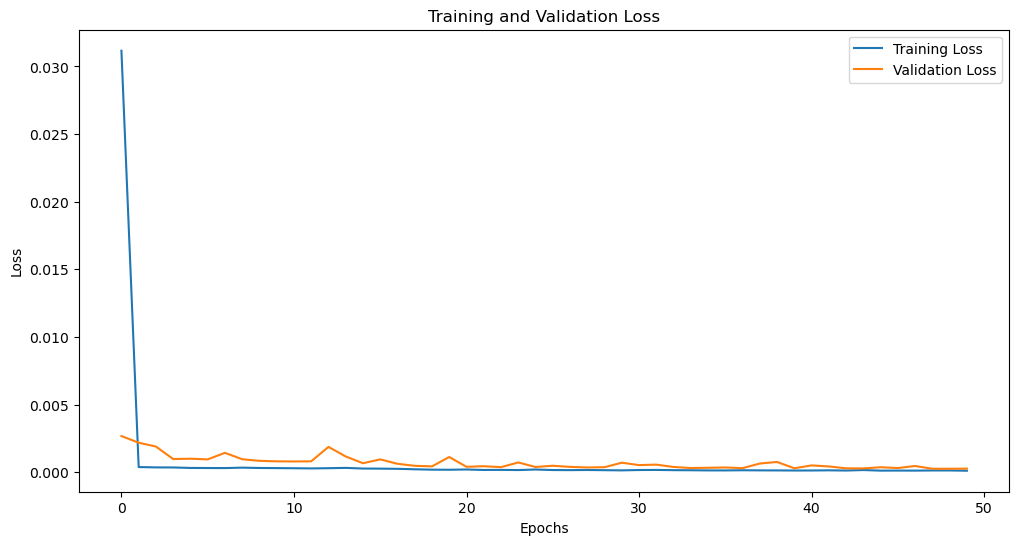

In [220]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [221]:

predicted_stock_price = model.predict(X_test)



33/33 [==============================] - 0s 6ms/step


In [222]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [223]:
plot_dates = df.index[train_size + seq_length:train_size + seq_length + len(test_data)]
test_data = test_data[:len(plot_dates)] 

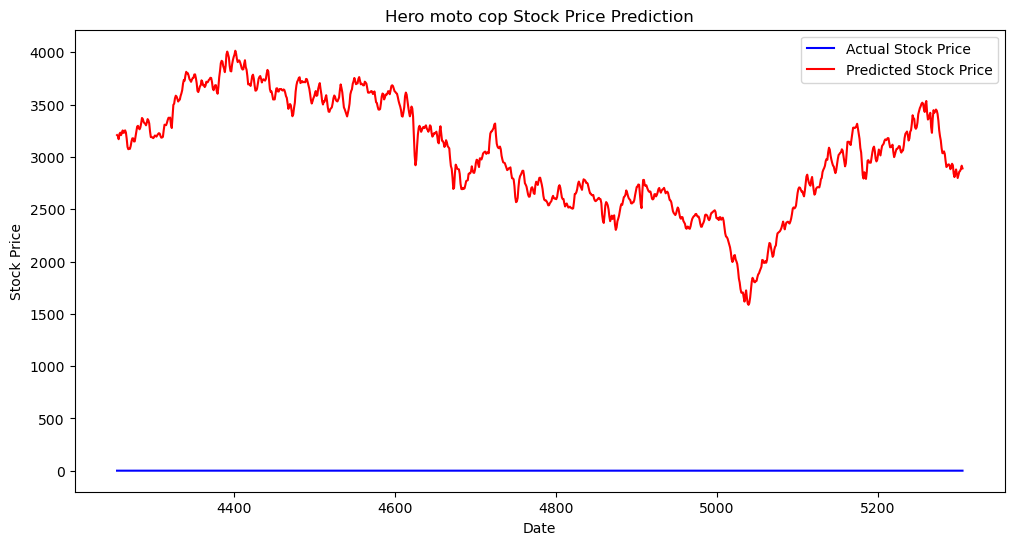

In [224]:
plt.figure(figsize=(12, 6))
plt.plot(plot_dates, test_data, label='Actual Stock Price', color='blue')
plt.plot(plot_dates, predicted_stock_price, label='Predicted Stock Price', color='red')
plt.legend()
plt.title('Hero moto cop Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()